In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
# Load dataset
data = pd.read_csv('/Parkinsons_total_updrs.csv')

In [64]:
# Split dataset into features and target variable
X = data.drop(columns=['total_UPDRS'])
y = data['total_UPDRS']


In [66]:
y.head()

0    34.398
1    34.894
2    35.389
3    35.810
4    36.375
Name: total_UPDRS, dtype: float64

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [70]:
# Function to plot metrics
def plot_metrics(model_name, mae, mse, r2):
    metrics = ['MAE', 'MSE', 'R²']
    values = [mae, mse, r2]
    plt.figure(figsize=(10, 5))
    plt.bar(metrics, values, color=['blue', 'green', 'red'])
    plt.title(f'{model_name} Performance Metrics')
    plt.ylabel('Values')
    plt.ylim(0, max(values) * 1.2)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
    plt.show()



3.1 Baseline - Linear Regression
(2.3552520705947453, 10.125996607446503, 0.9096230387431635)


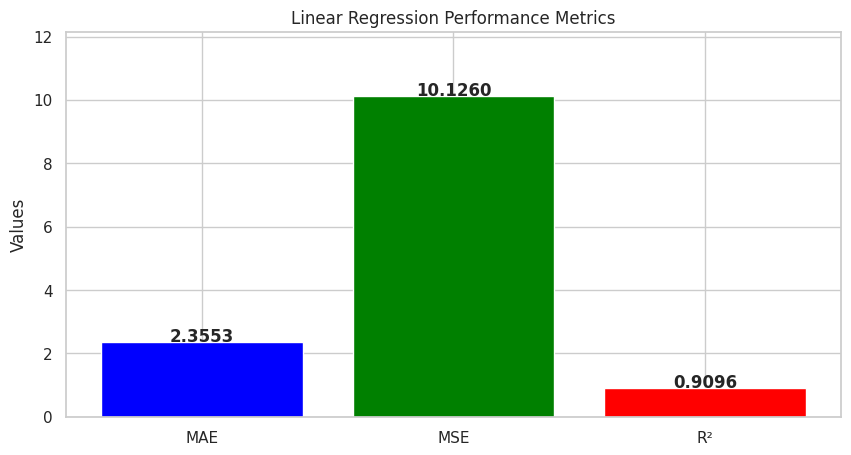

In [71]:
# 3.1 Baseline - Linear Regression
print("\n3.1 Baseline - Linear Regression")
linear_reg = LinearRegression()
linear_reg_results = evaluate_model(linear_reg, X_train_scaled, y_train, X_test_scaled, y_test)
print(linear_reg_results)
plot_metrics('Linear Regression', *linear_reg_results)


3.2 SVM with Linear Kernel
(2.3106663663816005, 10.79358667872492, 0.9036646363906475)


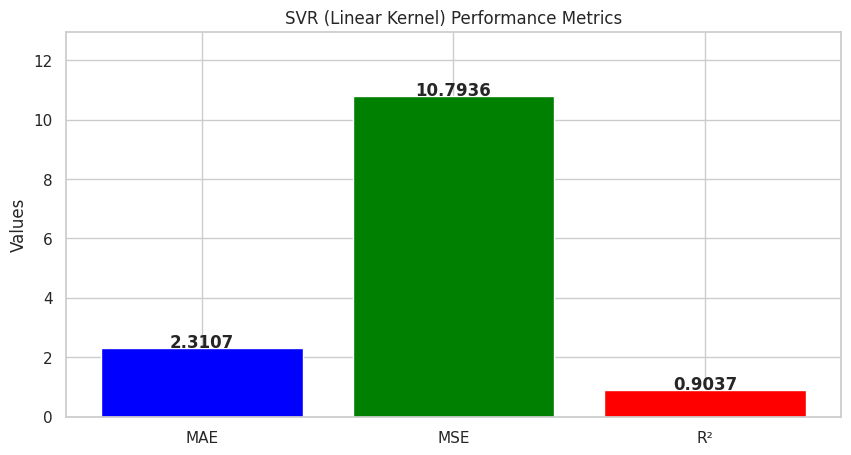

In [72]:
# 3.2 SVM with Linear Kernel
print("\n3.2 SVM with Linear Kernel")
svr_linear = SVR(kernel='linear')
svr_linear_results = evaluate_model(svr_linear, X_train_scaled, y_train, X_test_scaled, y_test)
print(svr_linear_results)
plot_metrics('SVR (Linear Kernel)', *svr_linear_results)


3.3 SVM with Polynomial Kernel
(4.05673282104589, 64.4452702382717, 0.42481042436578687)


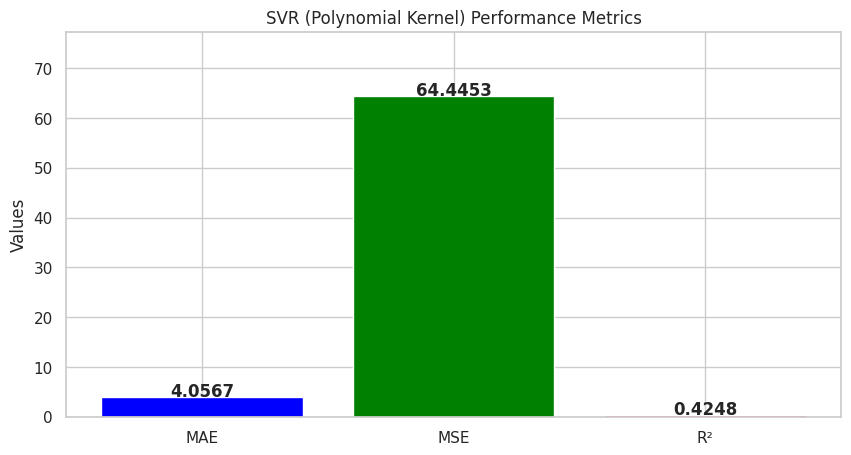

In [73]:
# 3.3 SVM with Polynomial Kernel
print("\n3.3 SVM with Polynomial Kernel")
svr_poly = SVR(kernel='poly')
svr_poly_results = evaluate_model(svr_poly, X_train_scaled, y_train, X_test_scaled, y_test)
print(svr_poly_results)
plot_metrics('SVR (Polynomial Kernel)', *svr_poly_results)


3.4 SVM with RBF Kernel
(1.799828502713355, 7.508152718003279, 0.9329879266593485)


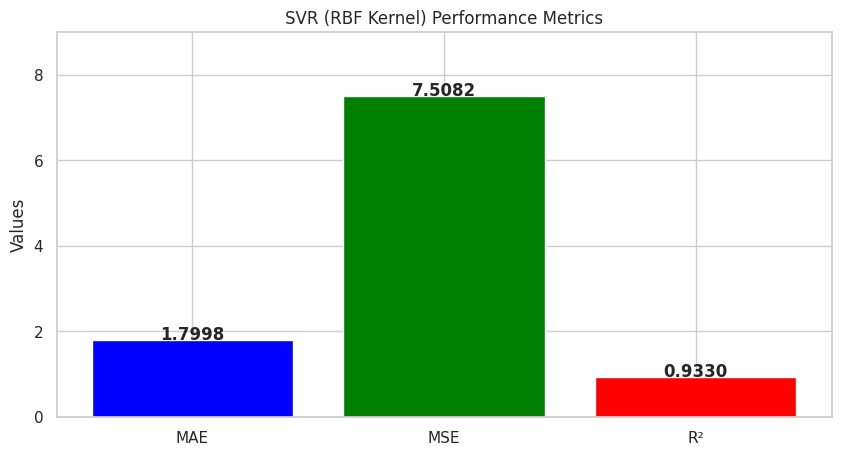

In [74]:
# 3.4 SVM with RBF Kernel
print("\n3.4 SVM with RBF Kernel")
svr_rbf = SVR(kernel='rbf')
svr_rbf_results = evaluate_model(svr_rbf, X_train_scaled, y_train, X_test_scaled, y_test)
print(svr_rbf_results)
plot_metrics('SVR (RBF Kernel)', *svr_rbf_results)


3.5 Decision Tree Regressor
(0.0918622191967327, 0.19407700344452022, 0.9982678159492716)


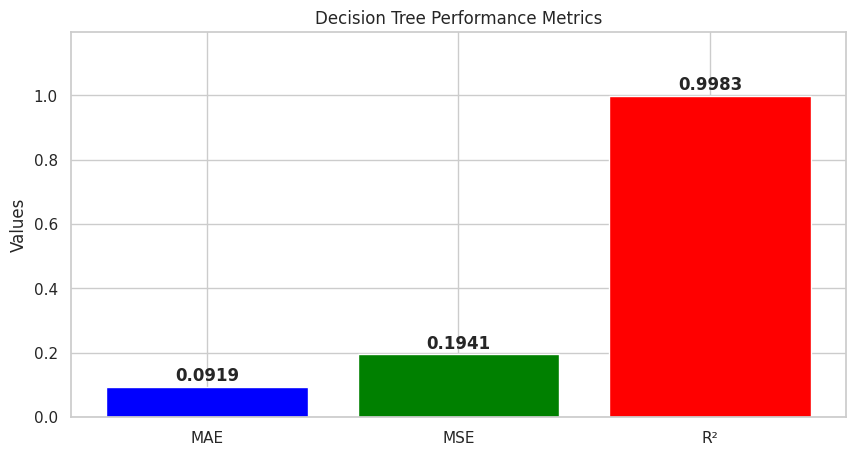

In [75]:
# 3.5 Decision Tree Regressor
print("\n3.5 Decision Tree Regressor")
dt_model = DecisionTreeRegressor()
dt_results = evaluate_model(dt_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(dt_results)
plot_metrics('Decision Tree', *dt_results)


3.6 Random Forest Regressor
(0.14752510483322084, 0.12320493442165532, 0.9989003662536595)


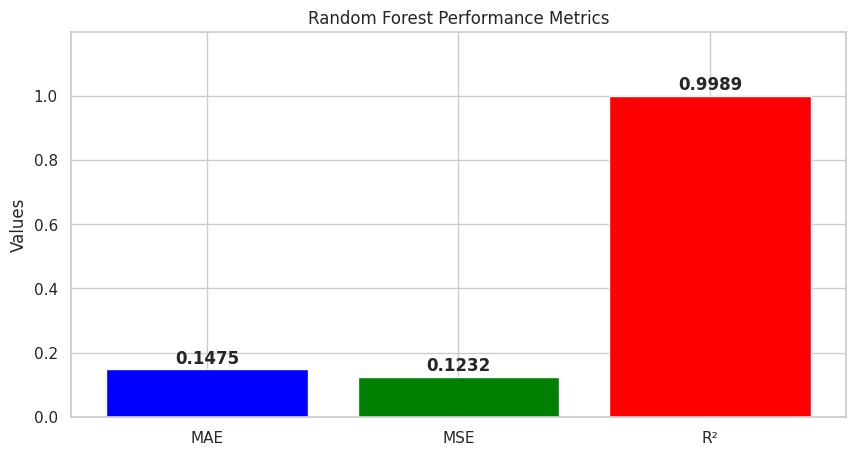

In [76]:
# 3.6 Random Forest Regressor
print("\n3.6 Random Forest Regressor")
rf_model = RandomForestRegressor(n_estimators=100)
rf_results = evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(rf_results)
plot_metrics('Random Forest', *rf_results)



3.7 AdaBoost Regressor
(2.183900190798681, 6.972460979391685, 0.9377691045900722)


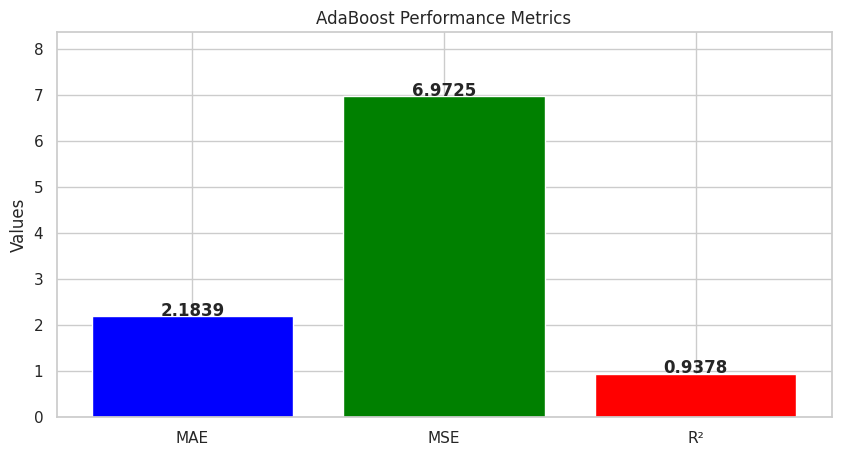

In [77]:
# 3.7 AdaBoost Regressor
print("\n3.7 AdaBoost Regressor")
ab_model = AdaBoostRegressor(n_estimators=100)
ab_results = evaluate_model(ab_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(ab_results)
plot_metrics('AdaBoost', *ab_results)



3.8 Gradient Boosting Regressor
(0.9534950687388717, 1.5692708463280896, 0.9859938793208977)


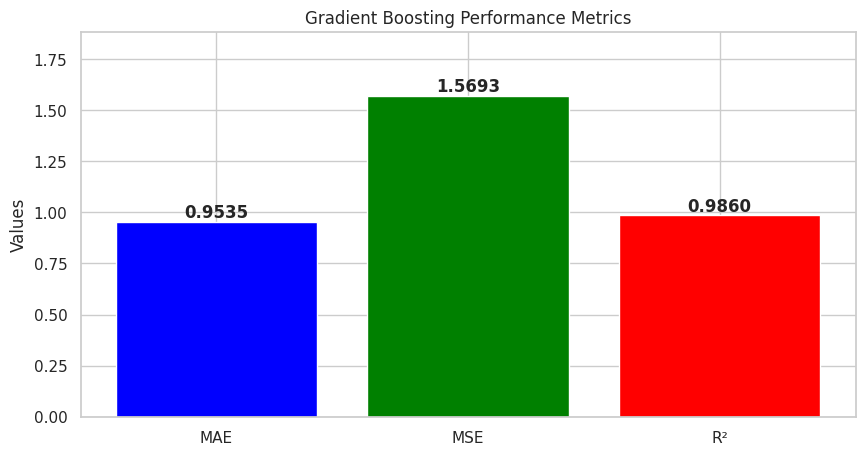

In [78]:
# 3.8 Gradient Boosting Regressor
print("\n3.8 Gradient Boosting Regressor")
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_results = evaluate_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(gb_results)
plot_metrics('Gradient Boosting', *gb_results)

In [79]:
# Summarize results in a table
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR (Linear Kernel)', 'SVR (Polynomial Kernel)', 'SVR (RBF Kernel)',
              'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'MAE': [linear_reg_results[0], svr_linear_results[0], svr_poly_results[0], svr_rbf_results[0],
            dt_results[0], rf_results[0], ab_results[0], gb_results[0]],
    'MSE': [linear_reg_results[1], svr_linear_results[1], svr_poly_results[1], svr_rbf_results[1],
            dt_results[1], rf_results[1], ab_results[1], gb_results[1]],
    'R²': [linear_reg_results[2], svr_linear_results[2], svr_poly_results[2], svr_rbf_results[2],
           dt_results[2], rf_results[2], ab_results[2], gb_results[2]]
})

print(results_df)

                     Model       MAE        MSE        R²
0        Linear Regression  2.355252  10.125997  0.909623
1      SVR (Linear Kernel)  2.310666  10.793587  0.903665
2  SVR (Polynomial Kernel)  4.056733  64.445270  0.424810
3         SVR (RBF Kernel)  1.799829   7.508153  0.932988
4            Decision Tree  0.091862   0.194077  0.998268
5            Random Forest  0.147525   0.123205  0.998900
6                 AdaBoost  2.183900   6.972461  0.937769
7        Gradient Boosting  0.953495   1.569271  0.985994


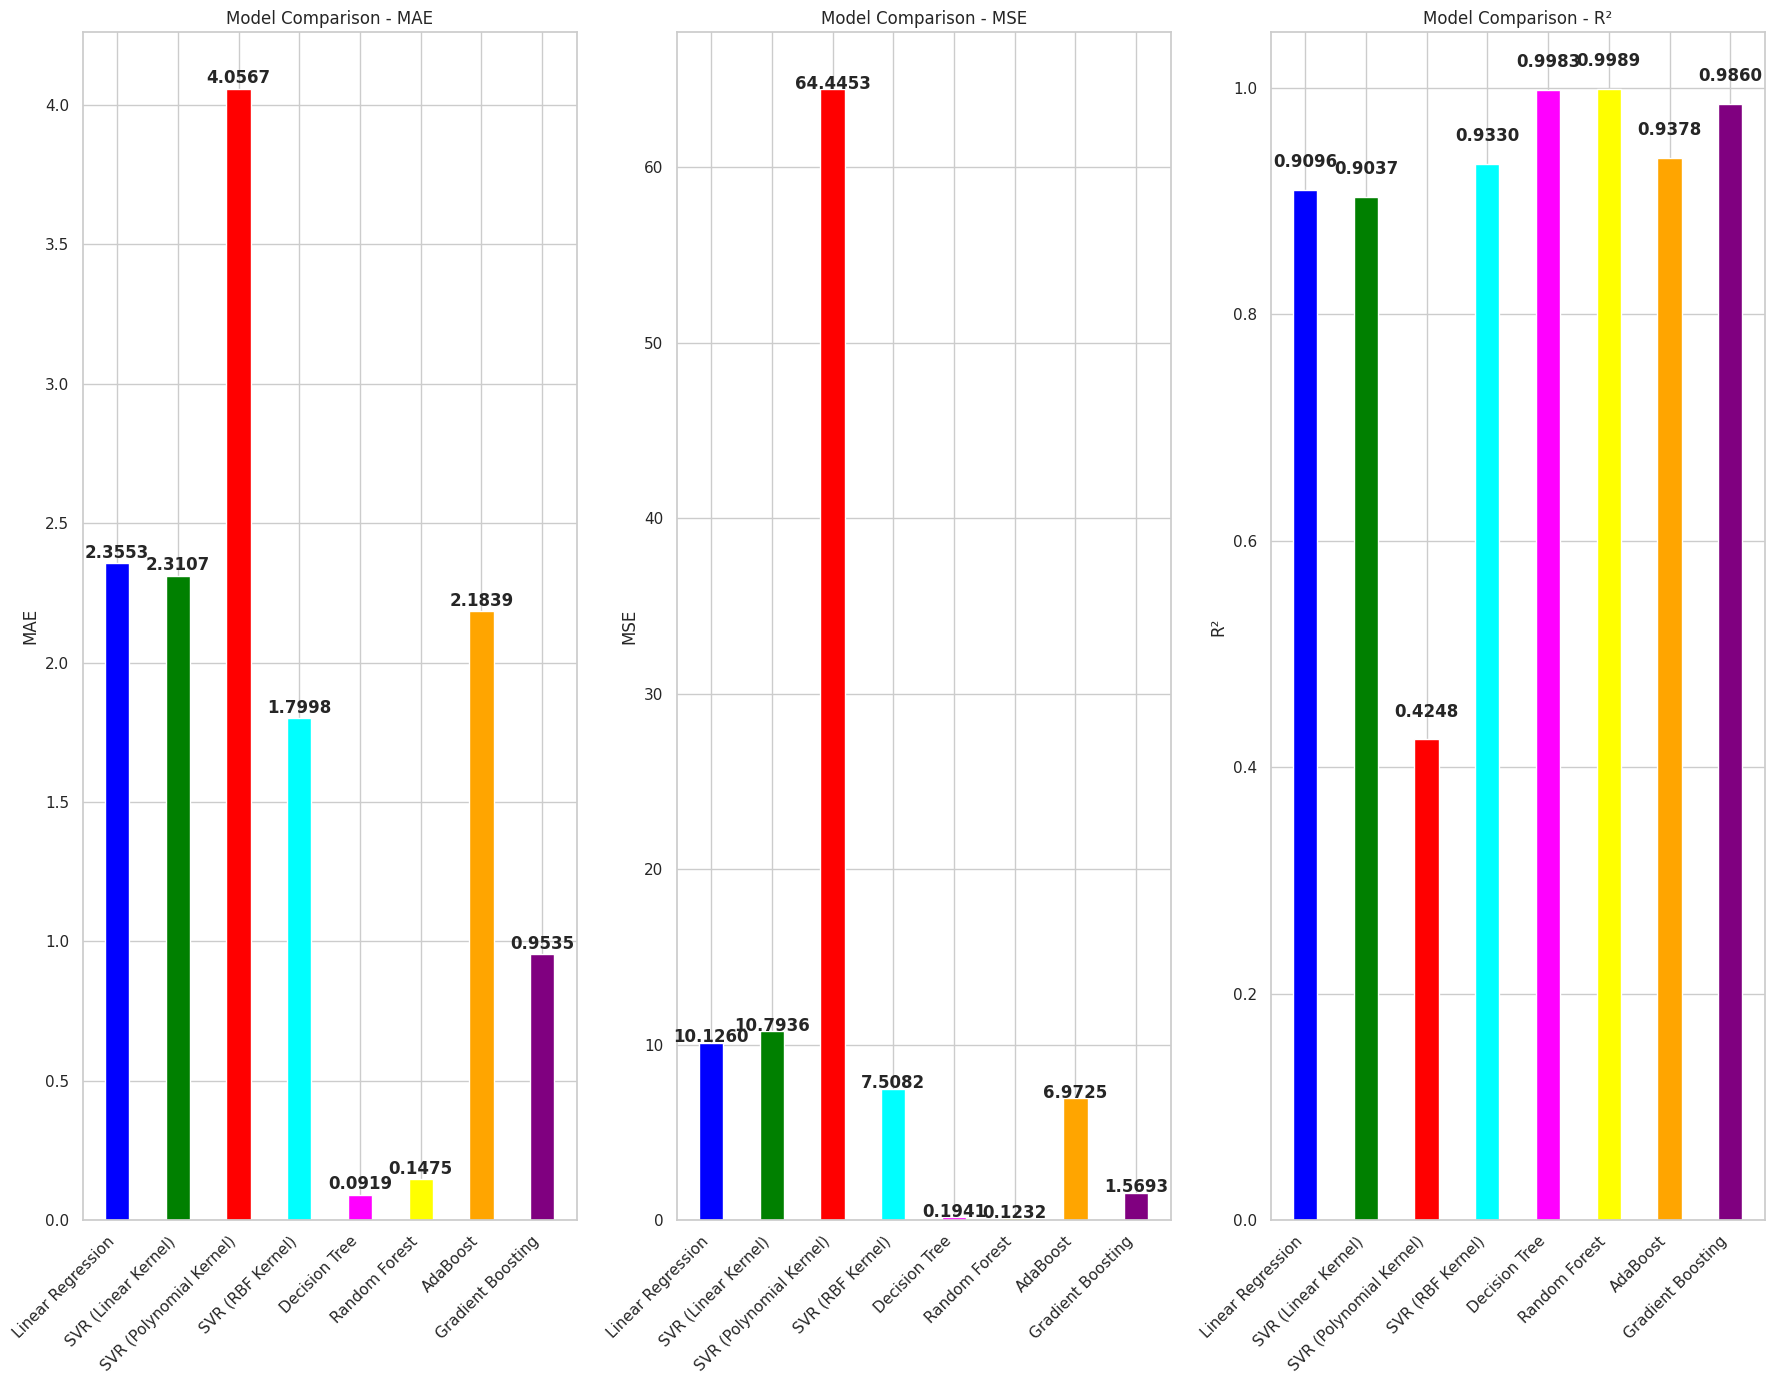

In [80]:
# Plot summary of all models' performance metrics
metrics = ['MAE', 'MSE', 'R²']
plt.figure(figsize=(18, 14))
bar_width = 0.4
x = np.arange(len(results_df['Model']))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.bar(x, results_df[metric], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple'], width=bar_width)
    plt.xticks(x, results_df['Model'], rotation=45, ha='right')
    plt.ylabel(metric)
    plt.title(f'Model Comparison - {metric}')
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value + 0.02, f'{value:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [81]:
# PHASE II HYPERPARAMETRE TUNING

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [83]:
# Load dataset
data = pd.read_csv('/Parkinsons_total_updrs.csv')


In [84]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [85]:
data.shape

(5875, 22)

In [86]:
# Features and target variable
X = data.drop(['total_UPDRS'], axis=1)
y = data['total_UPDRS']

In [87]:
y.head()

0    34.398
1    34.894
2    35.389
3    35.810
4    36.375
Name: total_UPDRS, dtype: float64

In [88]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

In [91]:
# Support Vector Machines (RBF Kernel)
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]}
svr = SVR(kernel='rbf')
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2')
grid_search_svr.fit(X_train_scaled, y_train)
best_svr = grid_search_svr.best_estimator_
svr_mae, svr_mse, svr_r2 = evaluate_model(best_svr, X_test_scaled, y_test)
print("SVM Results:", {'MAE': svr_mae, 'MSE': svr_mse, 'R2': svr_r2})


SVM Results: {'MAE': 0.6236989780397455, 'MSE': 1.2773393295456335, 'R2': 0.9885994384974132}


<Figure size 1000x600 with 0 Axes>

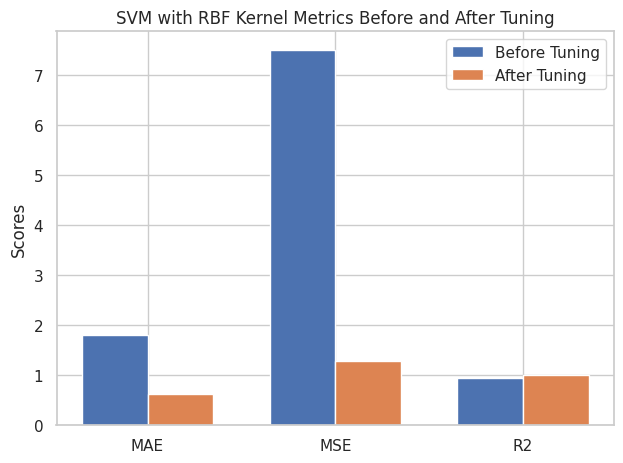

In [92]:
# Bar Graph for SVM with RBF Kernel
plt.figure(figsize=(10, 6))
metrics = ['MAE', 'MSE', 'R2']
before_tuning = [1.7998, 7.5082, 0.9330]
after_tuning = [svr_mae, svr_mse, svr_r2]
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning')

ax.set_ylabel('Scores')
ax.set_title('SVM with RBF Kernel Metrics Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [93]:
# Decision Trees
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt = DecisionTreeRegressor()
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train_scaled, y_train)
best_dt = grid_search_dt.best_estimator_
dt_mae, dt_mse, dt_r2 = evaluate_model(best_dt, X_test_scaled, y_test)
print("Decision Tree Results:", {'MAE': dt_mae, 'MSE': dt_mse, 'R2': dt_r2})


Decision Tree Results: {'MAE': 0.09909142273655573, 'MSE': 0.14998419838126856, 'R2': 0.9986613548659227}


<Figure size 1000x600 with 0 Axes>

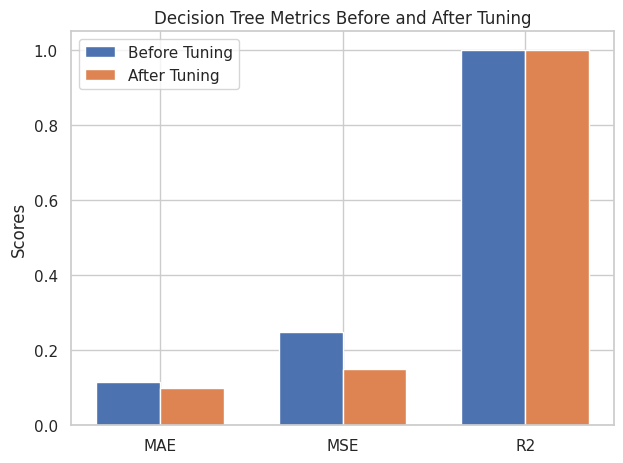

In [95]:
# Bar Graph for Decision Tree
plt.figure(figsize=(10, 6))
before_tuning = [0.1145, 0.2468, 0.9977]
after_tuning = [dt_mae, dt_mse, dt_r2]
x = np.arange(len(metrics))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning')

ax.set_ylabel('Scores')
ax.set_title('Decision Tree Metrics Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [96]:
# Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_
rf_mae, rf_mse, rf_r2 = evaluate_model(best_rf, X_test_scaled, y_test)
print("Random Forest Results:", {'MAE': rf_mae, 'MSE': rf_mse, 'R2': rf_r2})

Random Forest Results: {'MAE': 0.14279824551849613, 'MSE': 0.1108703627545752, 'R2': 0.9990104552798454}


<Figure size 1000x600 with 0 Axes>

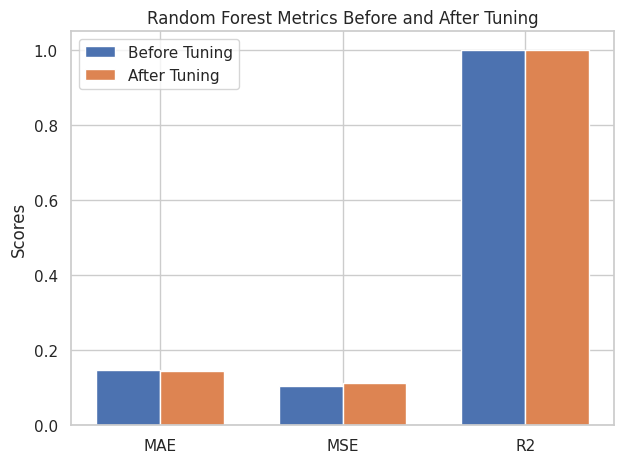

In [97]:
# Bar Graph for Random Forest
plt.figure(figsize=(10, 6))
before_tuning = [0.1456, 0.1038, 0.9990]
after_tuning = [rf_mae, rf_mse, rf_r2]
x = np.arange(len(metrics))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning')

ax.set_ylabel('Scores')
ax.set_title('Random Forest Metrics Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [98]:
# AdaBoost
param_grid_ab = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
ab = AdaBoostRegressor()
grid_search_ab = GridSearchCV(ab, param_grid_ab, cv=5, scoring='r2')
grid_search_ab.fit(X_train_scaled, y_train)
best_ab = grid_search_ab.best_estimator_
ab_mae, ab_mse, ab_r2 = evaluate_model(best_ab, X_test_scaled, y_test)
print("AdaBoost Results:", {'MAE': ab_mae, 'MSE': ab_mse, 'R2': ab_r2})


AdaBoost Results: {'MAE': 2.1425530306329916, 'MSE': 6.787702128914807, 'R2': 0.9394181218788127}


<Figure size 1000x600 with 0 Axes>

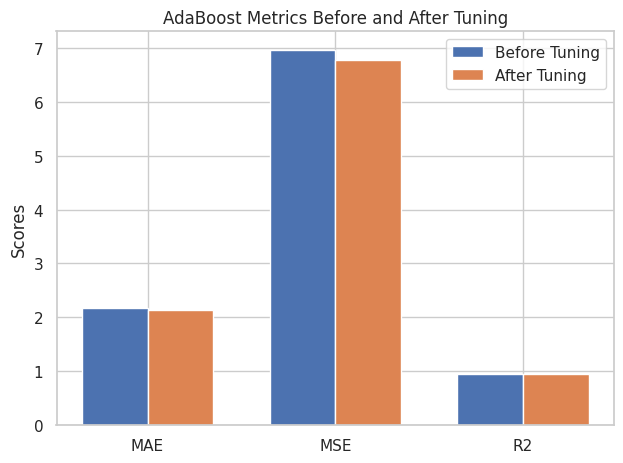

In [99]:
# Bar Graph for AdaBoost
plt.figure(figsize=(10, 6))
before_tuning = [2.1680, 6.9646, 0.9378]
after_tuning = [ab_mae, ab_mse, ab_r2]
x = np.arange(len(metrics))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning')

ax.set_ylabel('Scores')
ax.set_title('AdaBoost Metrics Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [100]:
# Gradient Boosting
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 4, 5]}
gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='r2')
grid_search_gb.fit(X_train_scaled, y_train)
best_gb = grid_search_gb.best_estimator_
gb_mae, gb_mse, gb_r2 = evaluate_model(best_gb, X_test_scaled, y_test)
print("Gradient Boosting Results:", {'MAE': gb_mae, 'MSE': gb_mse, 'R2': gb_r2})

Gradient Boosting Results: {'MAE': 0.24564144016735706, 'MSE': 0.12055919717540503, 'R2': 0.9989239800965107}


<Figure size 1000x600 with 0 Axes>

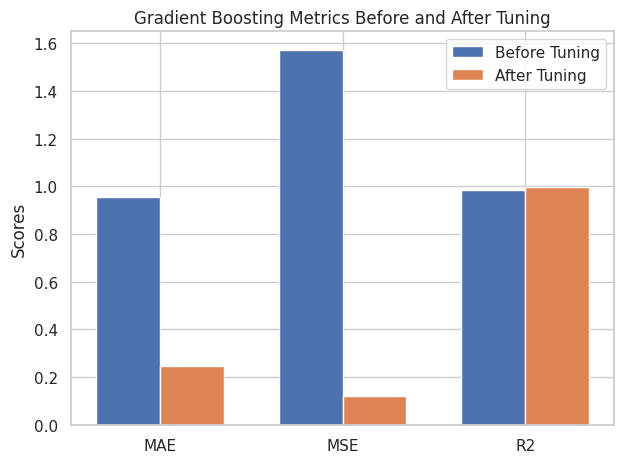

In [101]:
# Bar Graph for Gradient Boosting
plt.figure(figsize=(10, 6))
before_tuning = [0.9537, 1.5709, 0.9859]
after_tuning = [gb_mae, gb_mse, gb_r2]
x = np.arange(len(metrics))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning')

ax.set_ylabel('Scores')
ax.set_title('Gradient Boosting Metrics Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [102]:
# Tabulate the results before and after hyperparameter tuning
results_df = pd.DataFrame({
    'Model': ['SVM with RBF Kernel', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'MAE (Before)': [1.7998, 0.1145, 0.1456, 2.1680, 0.9537],
    'MSE (Before)': [7.5081, 0.2468, 0.1038, 6.9646, 1.5709],
    'R2 (Before)': [0.9329, 0.9977, 0.9990, 0.9378, 0.9859],
    'MAE (After)': [svr_mae, dt_mae, rf_mae, ab_mae, gb_mae],
    'MSE (After)': [svr_mse, dt_mse, rf_mse, ab_mse, gb_mse],
    'R2 (After)': [svr_r2, dt_r2, rf_r2, ab_r2, gb_r2]
})

In [103]:
# Define the colors
colors_before = ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4']
colors_after = ['#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e']

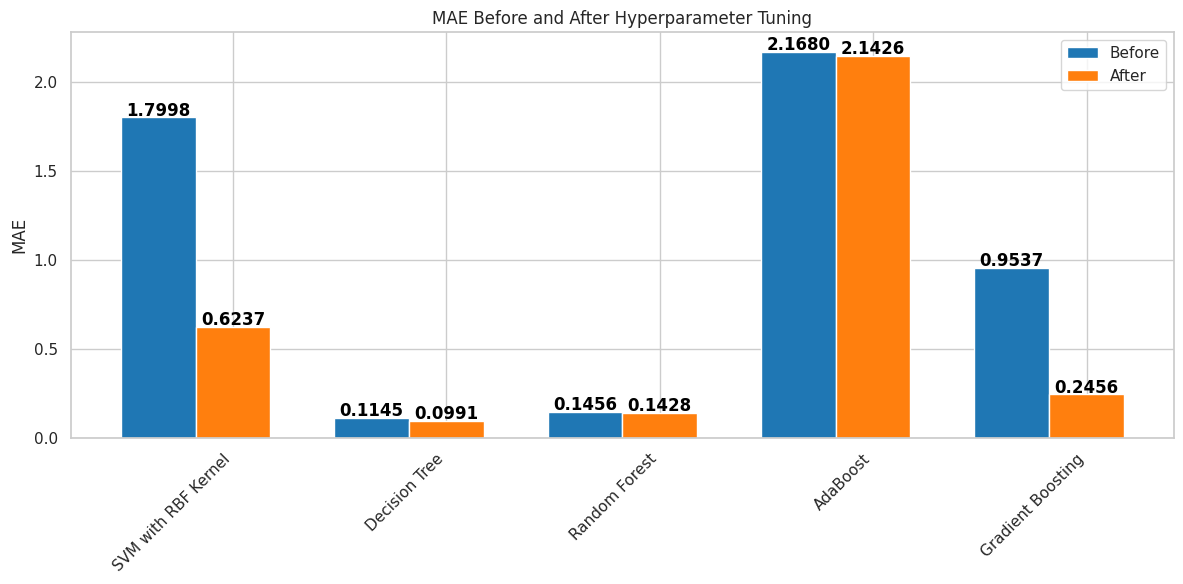

In [104]:
# Plot MAE before and after tuning
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df['Model']))
width = 0.35
plt.bar(x - width, results_df['MAE (Before)'], width, color=colors_before, label='Before')
plt.bar(x, results_df['MAE (After)'], width, color=colors_after, label='After')
plt.title('MAE Before and After Hyperparameter Tuning')
plt.ylabel('MAE')
plt.xticks(x, results_df['Model'], rotation=45, ha="right")
plt.legend()
for i, v in enumerate(results_df['MAE (Before)']):
    plt.text(i - width, v + 0.01, f"{v:.4f}", ha='center', color='black', fontweight='bold')
for i, v in enumerate(results_df['MAE (After)']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', color='black', fontweight='bold')
plt.tight_layout()
plt.show()

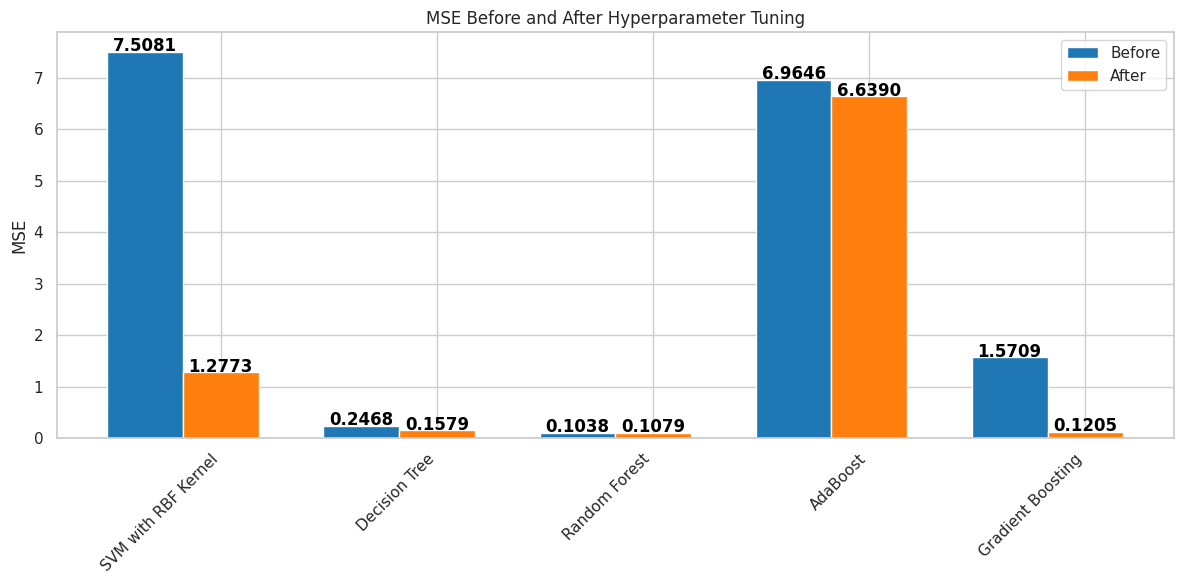

In [54]:
# Plot MSE before and after tuning
plt.figure(figsize=(12, 6))
plt.bar(x - width, results_df['MSE (Before)'], width, color=colors_before, label='Before')
plt.bar(x, results_df['MSE (After)'], width, color=colors_after, label='After')
plt.title('MSE Before and After Hyperparameter Tuning')
plt.ylabel('MSE')
plt.xticks(x, results_df['Model'], rotation=45, ha="right")
plt.legend()
for i, v in enumerate(results_df['MSE (Before)']):
    plt.text(i - width, v + 0.01, f"{v:.4f}", ha='center', color='black', fontweight='bold')
for i, v in enumerate(results_df['MSE (After)']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', color='black', fontweight='bold')
plt.tight_layout()
plt.show()

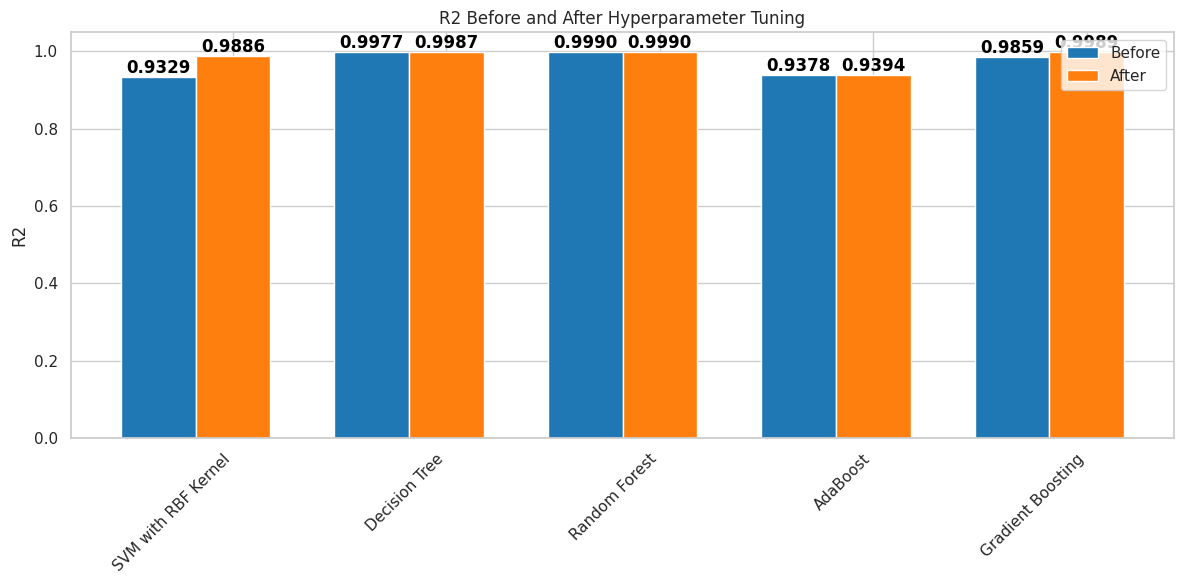

In [105]:
# Plot R2 before and after tuning
plt.figure(figsize=(12, 6))
plt.bar(x - width, results_df['R2 (Before)'], width, color=colors_before, label='Before')
plt.bar(x, results_df['R2 (After)'], width, color=colors_after, label='After')
plt.title('R2 Before and After Hyperparameter Tuning')
plt.ylabel('R2')
plt.xticks(x, results_df['Model'], rotation=45, ha="right")
plt.legend()
for i, v in enumerate(results_df['R2 (Before)']):
    plt.text(i - width, v + 0.01, f"{v:.4f}", ha='center', color='black', fontweight='bold')
for i, v in enumerate(results_df['R2 (After)']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', color='black', fontweight='bold')
plt.tight_layout()
plt.show()

In [106]:
# Data Visualization
# PCA for Feature Reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [107]:
# Feature Selection
selector = SelectPercentile(f_regression, percentile=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


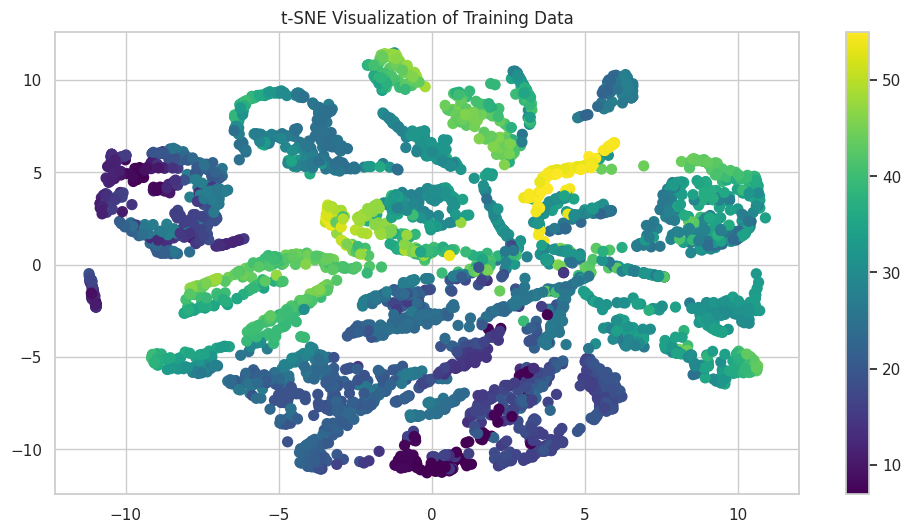

In [108]:
# t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=300)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=50)
plt.colorbar()
plt.title('t-SNE Visualization of Training Data')
plt.show()


In [109]:
# Print the final results in a tabulated form
print("Final Results")
print(results_df.to_markdown(index=False))

Final Results
| Model               |   MAE (Before) |   MSE (Before) |   R2 (Before) |   MAE (After) |   MSE (After) |   R2 (After) |
|:--------------------|---------------:|---------------:|--------------:|--------------:|--------------:|-------------:|
| SVM with RBF Kernel |         1.7998 |         7.5081 |        0.9329 |     0.623699  |      1.27734  |     0.988599 |
| Decision Tree       |         0.1145 |         0.2468 |        0.9977 |     0.0990914 |      0.149984 |     0.998661 |
| Random Forest       |         0.1456 |         0.1038 |        0.999  |     0.142798  |      0.11087  |     0.99901  |
| AdaBoost            |         2.168  |         6.9646 |        0.9378 |     2.14255   |      6.7877   |     0.939418 |
| Gradient Boosting   |         0.9537 |         1.5709 |        0.9859 |     0.245641  |      0.120559 |     0.998924 |
